In [1]:
import andi
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('..')
from andi_funcs import package_tracks
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_absolute_error

%matplotlib notebook
np.random.seed(3) 

## Inference of anomalous exponents using trained CNNs

This notebook demonstrates how to use the trained CNN models in this package to perform anomalous exponent inference on trajectories. This is demonstrated here with simulated (1D) data.

First we need to load the relevant model for 1D tracks. There is a separate model for 2D tracks.

#### Load model

In [2]:
model = load_model('../Task1_Exponent/Models/1D.h5');

2021-08-01 20:02:29.513833: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN)to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-08-01 20:02:29.534583: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7ffe7f1574c0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2021-08-01 20:02:29.534598: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version


#### Generate data

Generate data using the andi_datasets package. This will simulate trajectories with an anomalous exponent randomly drawn from a uniform distribution in the range [0, 2]. 

In [3]:
AD = andi.andi_datasets()
X1, Y1, X2, Y2, X3, Y3 = AD.andi_dataset(N=100, min_T=10, max_T=1001, tasks=[1], dimensions=[1])

exponents_truth = np.array(Y1[0])
tracks = X1[0]

Creating a dataset for task(s) [1] and dimension(s) [1].
Generating dataset for dimension 1.


/Users/blandt/anaconda3/anaconda3/envs/andi/lib/python3.7/site-packages/fbm/fbm.py:172: UserWarning: Combination of increments n and Hurst value H invalid for Davies-Harte method. Reverting to Hosking method. Occurs when n is small and Hurst is close to 1. 
  "Combination of increments n and Hurst value H "


#### Preprocess/package tracks

Preprocessing and packaging the tracks for input into the CNN. See [here](trajectory_preprocessing.ipynb) for details.

In [4]:
cnn_input = package_tracks(tracks=tracks, max_T=1001, dimensions=1)

#### Perform predictions

The CNN model takes the cnn_input and outputs a predicted anomalous exponent for each trajectory

In [5]:
exponents_predicted = model.predict(cnn_input);
print(exponents_predicted.shape)

(100, 1)


#### Assessing the quality of predictions

Plotting the ground truth vs predicted exponent shows a good correlation. Performance can be more accurately assessed by increasing the number of tracks.

<IPython.core.display.Javascript object>


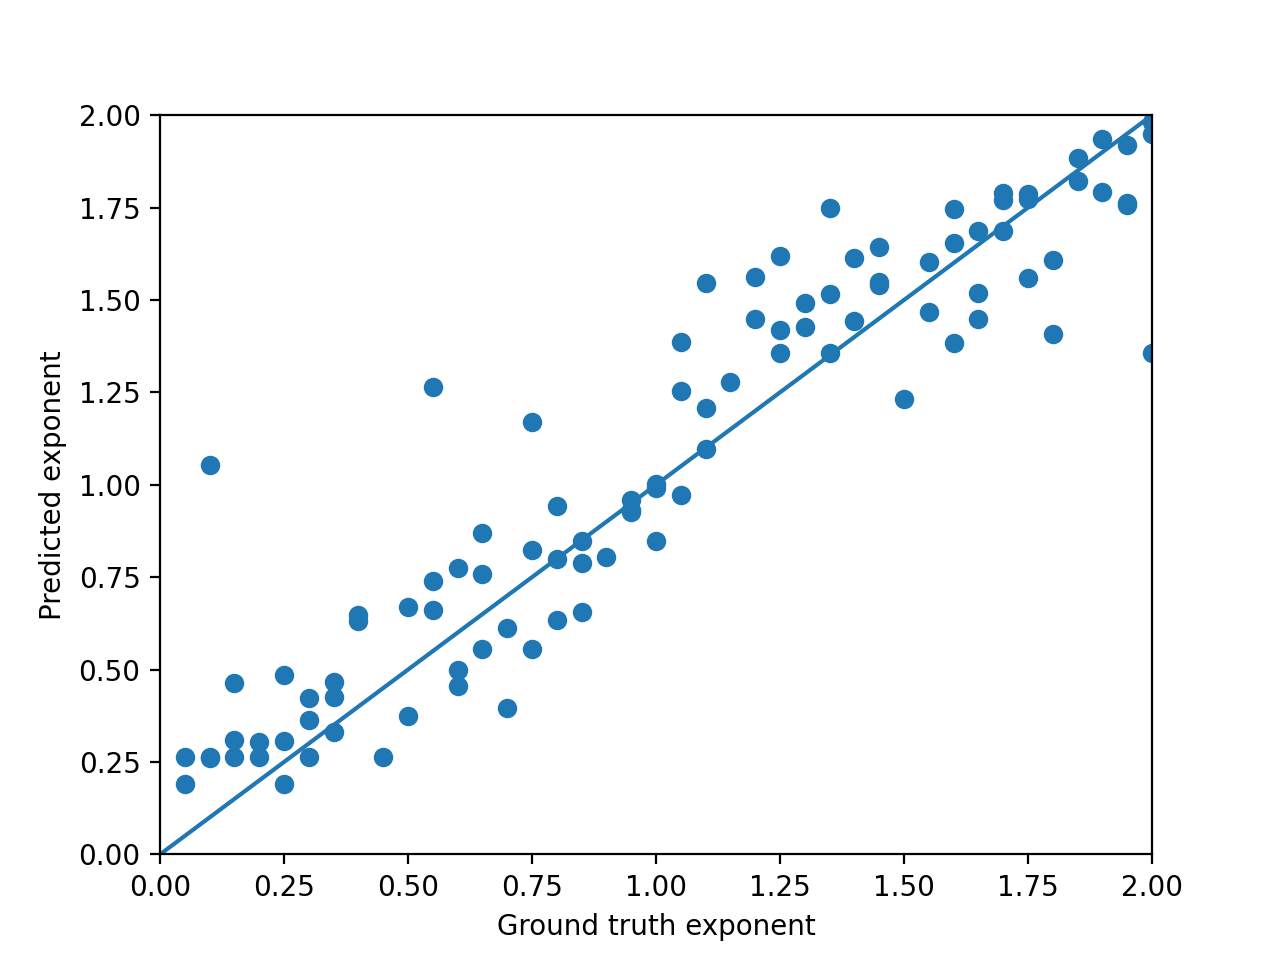

Text(0, 0.5, 'Predicted exponent')

In [6]:
fig, ax = plt.subplots()
ax.scatter(exponents_truth, exponents_predicted)
ax.plot([0, 2], [0, 2])
ax.set_xlim(0, 2)
ax.set_ylim(0, 2)
ax.set_xlabel('Ground truth exponent')
ax.set_ylabel('Predicted exponent')

In [7]:
print('Mean absolute error = ', mean_absolute_error(exponents_truth, exponents_predicted))

Mean absolute error =  0.15564135020971295
